# Exploration of data

In [26]:
%matplotlib inline

from waveletAnalysis import waveletAnalysis as wave
import timecourseAnalysis as tca
from hdf5manager import hdf5manager as h5
from matplotlib import pyplot as plt
from wholeBrainPCA import *
import scipy
import math
from scipy import ndimage
from skimage.measure import label, regionprops
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.externals import joblib
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from scipy.stats import multivariate_normal as mvn
from scipy.spatial.distance import cdist
# from django import *

import os

# plt.rc("font", size=14)
# sns.set(style="white")
# sns.set(style="whitegrid", color_codes=True)

# import plotly
# plotly.tools.set_credentials_file(username='brmullen', api_key='w9zNJSqbIzgDUYE9ET7R')

In [21]:
#Open file
path = '/Users/shreyamantripragada/Documents/'
file = '170721_07_c2_gridOpticFlow_metrics.csv'
tsv_output_file = path + file
data = pd.DataFrame.from_csv(tsv_output_file)

print(data.head())

   angs.stdev   angs.mean  mov.mean  mov.std  mov.mode  mov.range  \
0   99.903343  173.721863     0.314    2.895         1     43.899   
1         NaN         NaN     0.000    0.000     17777      0.000   
2         NaN         NaN     0.000    0.000     17777      0.000   
3         NaN         NaN     0.000    0.000     17777      0.000   
4         NaN         NaN     0.000    0.000     17777      0.000   

   mov.eventrest  mov.maxeventval  mov.surfarea  mov.totalmag  ...  \
0              1            0.314           620      4646.952  ...   
1              0            0.000             0         0.000  ...   
2              0            0.000             0         0.000  ...   
3              0            0.000             0         0.000  ...   
4              0            0.000             0         0.000  ...   

   move.timefromevent  mov.numlocmax  brain.data  brain.eventrest  \
0                   0            189      -0.038                0   
1                   1     

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  """


In [22]:
%matplotlib inline

col_list = list(data)

#puts the paramter on a scale of 0 to 1

data -= data.min()
data /= data.max()
data['mov.mean'] = data['mov.mean']
data = data.fillna(value=0)


#print(data.head())

In [59]:
#notnoise_index = data.loc[data['standard_deviation'] < 1].index

# def sepHist(data, artifact, noise):
    
#     noisedf = data[classify == 2]
#     artifactdf = data[classify == 1]
#     sigdf = data[classify == 0]
#     return noisedf, artifactdf, sigdf

# noisedf, artifactdf, sigdf = sepHist(data, artifact, noise)
col_list = data.columns.tolist()
print(col_list)

#print(data.loc[(data['mov.eventrest'] == 0.0) & (data['brain.eventrest'] == 1.0)].index)
data = data.astype('float16')
data['classification'] = np.zeros(len(data))
data['classification'].iloc[data.loc[(data['mov.eventrest'] == 0.0) & (data['brain.eventrest'] == 1.0)].index] = 0
data['classification'].iloc[data.loc[(data['mov.eventrest'] == 0.0) & (data['brain.eventrest'] == 0.0)].index] = 3
data['classification'].iloc[data.loc[(data['mov.eventrest'] == 1.0) & (data['brain.eventrest'] == 1.0)].index] = 1
data['classification'].iloc[data.loc[(data['mov.eventrest'] == 1.0) & (data['brain.eventrest'] == 0.0)].index] = 2


# for col in col_list:
#     print(col)

#     fig , ax1 = plt.subplots()
#     ax1.hist(data.loc[body_rest_brain_active, col], bins = 25, alpha = 0.5, label ='mo', color = 'g')
#     ax1.grid(False)         
#     ax1.set_xlabel('Values')
#     ax1.set_ylabel('# of instances', color = 'green')

#     ax2 = ax1.twinx()
#     ax2.hist(data.loc[body_rest_brain_rest, col], bins = 25, alpha = 0.5, label ='body_rest_brain_rest', color = 'b')
#     ax2.set_ylabel('# of instances', color = 'blue')
#     ax2.grid(False)
    
#     ax3 = ax1.twinx()
#     ax3.hist(data.loc[body_active_brain_active], bins = 25, alpha = 0.5, label = 'body_active_brain_active', color = 'o')
#     ax3.set_ylabel('# of instances', color = 'orange')
#     ax3.grid(False)
    
#     ax4 = ax1.twinx()
#     ax4.hist(data.loc[body_active_brain_rest], bins = 25, alpha = 0.5, label = 'body_active_brain_rest', color = 'k')
#     ax4.set_ylable('# of instances', color = 'black')
#     ax4.grid(False)
    
# #     ax2.hist(noisedf[col].dropna(), bins = 25, alpha = 0.5, label ='noise', color = 'r')
# #     ax2.set_xlabel('Values')
# #     ax2.set_ylabel('# of instances', color = 'red')
    
#     ax1.legend(loc='upper left')
#     ax2.legend(loc='upper right')
    
#     plt.show()

    
    
#     fig = plt.figure()
#     x = data.loc[(data[col]) & (noise[:X_reduced_tsne.shape[0]] == 0)]
#     y = data.iloc[[noise[:X_reduced_tsne.shape[0]] == 1],col]
#     ax = fig.add_subplot(111)
#     _ = ax.hist(x)
#     _ = ax.hist(y, color ='red', alpha=0.3)
    
# #     data[col,np.where(noise[:X_reduced_tsne.shape[0]] == 0)]
# #     d
#     plt.show()

# for col in col_list:
#     print(col)
#     data3[col].apply(np.log2).hist(by = noise[:X_reduced_tsne.shape[0]])
#     plt.show()


['mov.mean', 'mov.std', 'mov.mode', 'mov.range', 'mov.eventrest', 'mov.maxeventval', 'mov.surfarea', 'mov.totalmag', 'mov.firstder', 'mov.secder', 'mov.stdx', 'mov.stdy', 'mov.diffxystd', 'mov.diffmaxevents', 'mov.percent', 'mov.percenterror', 'mov.timetoevent', 'move.timefromevent', 'brain.data', 'brain.eventrest', 'brain.rangemaxmin', 'brain.firstder', 'brain.secder', 'diff.brainmov', 'diff.brainmovfirstder', 'diff.brainmovsecder', 'classification']


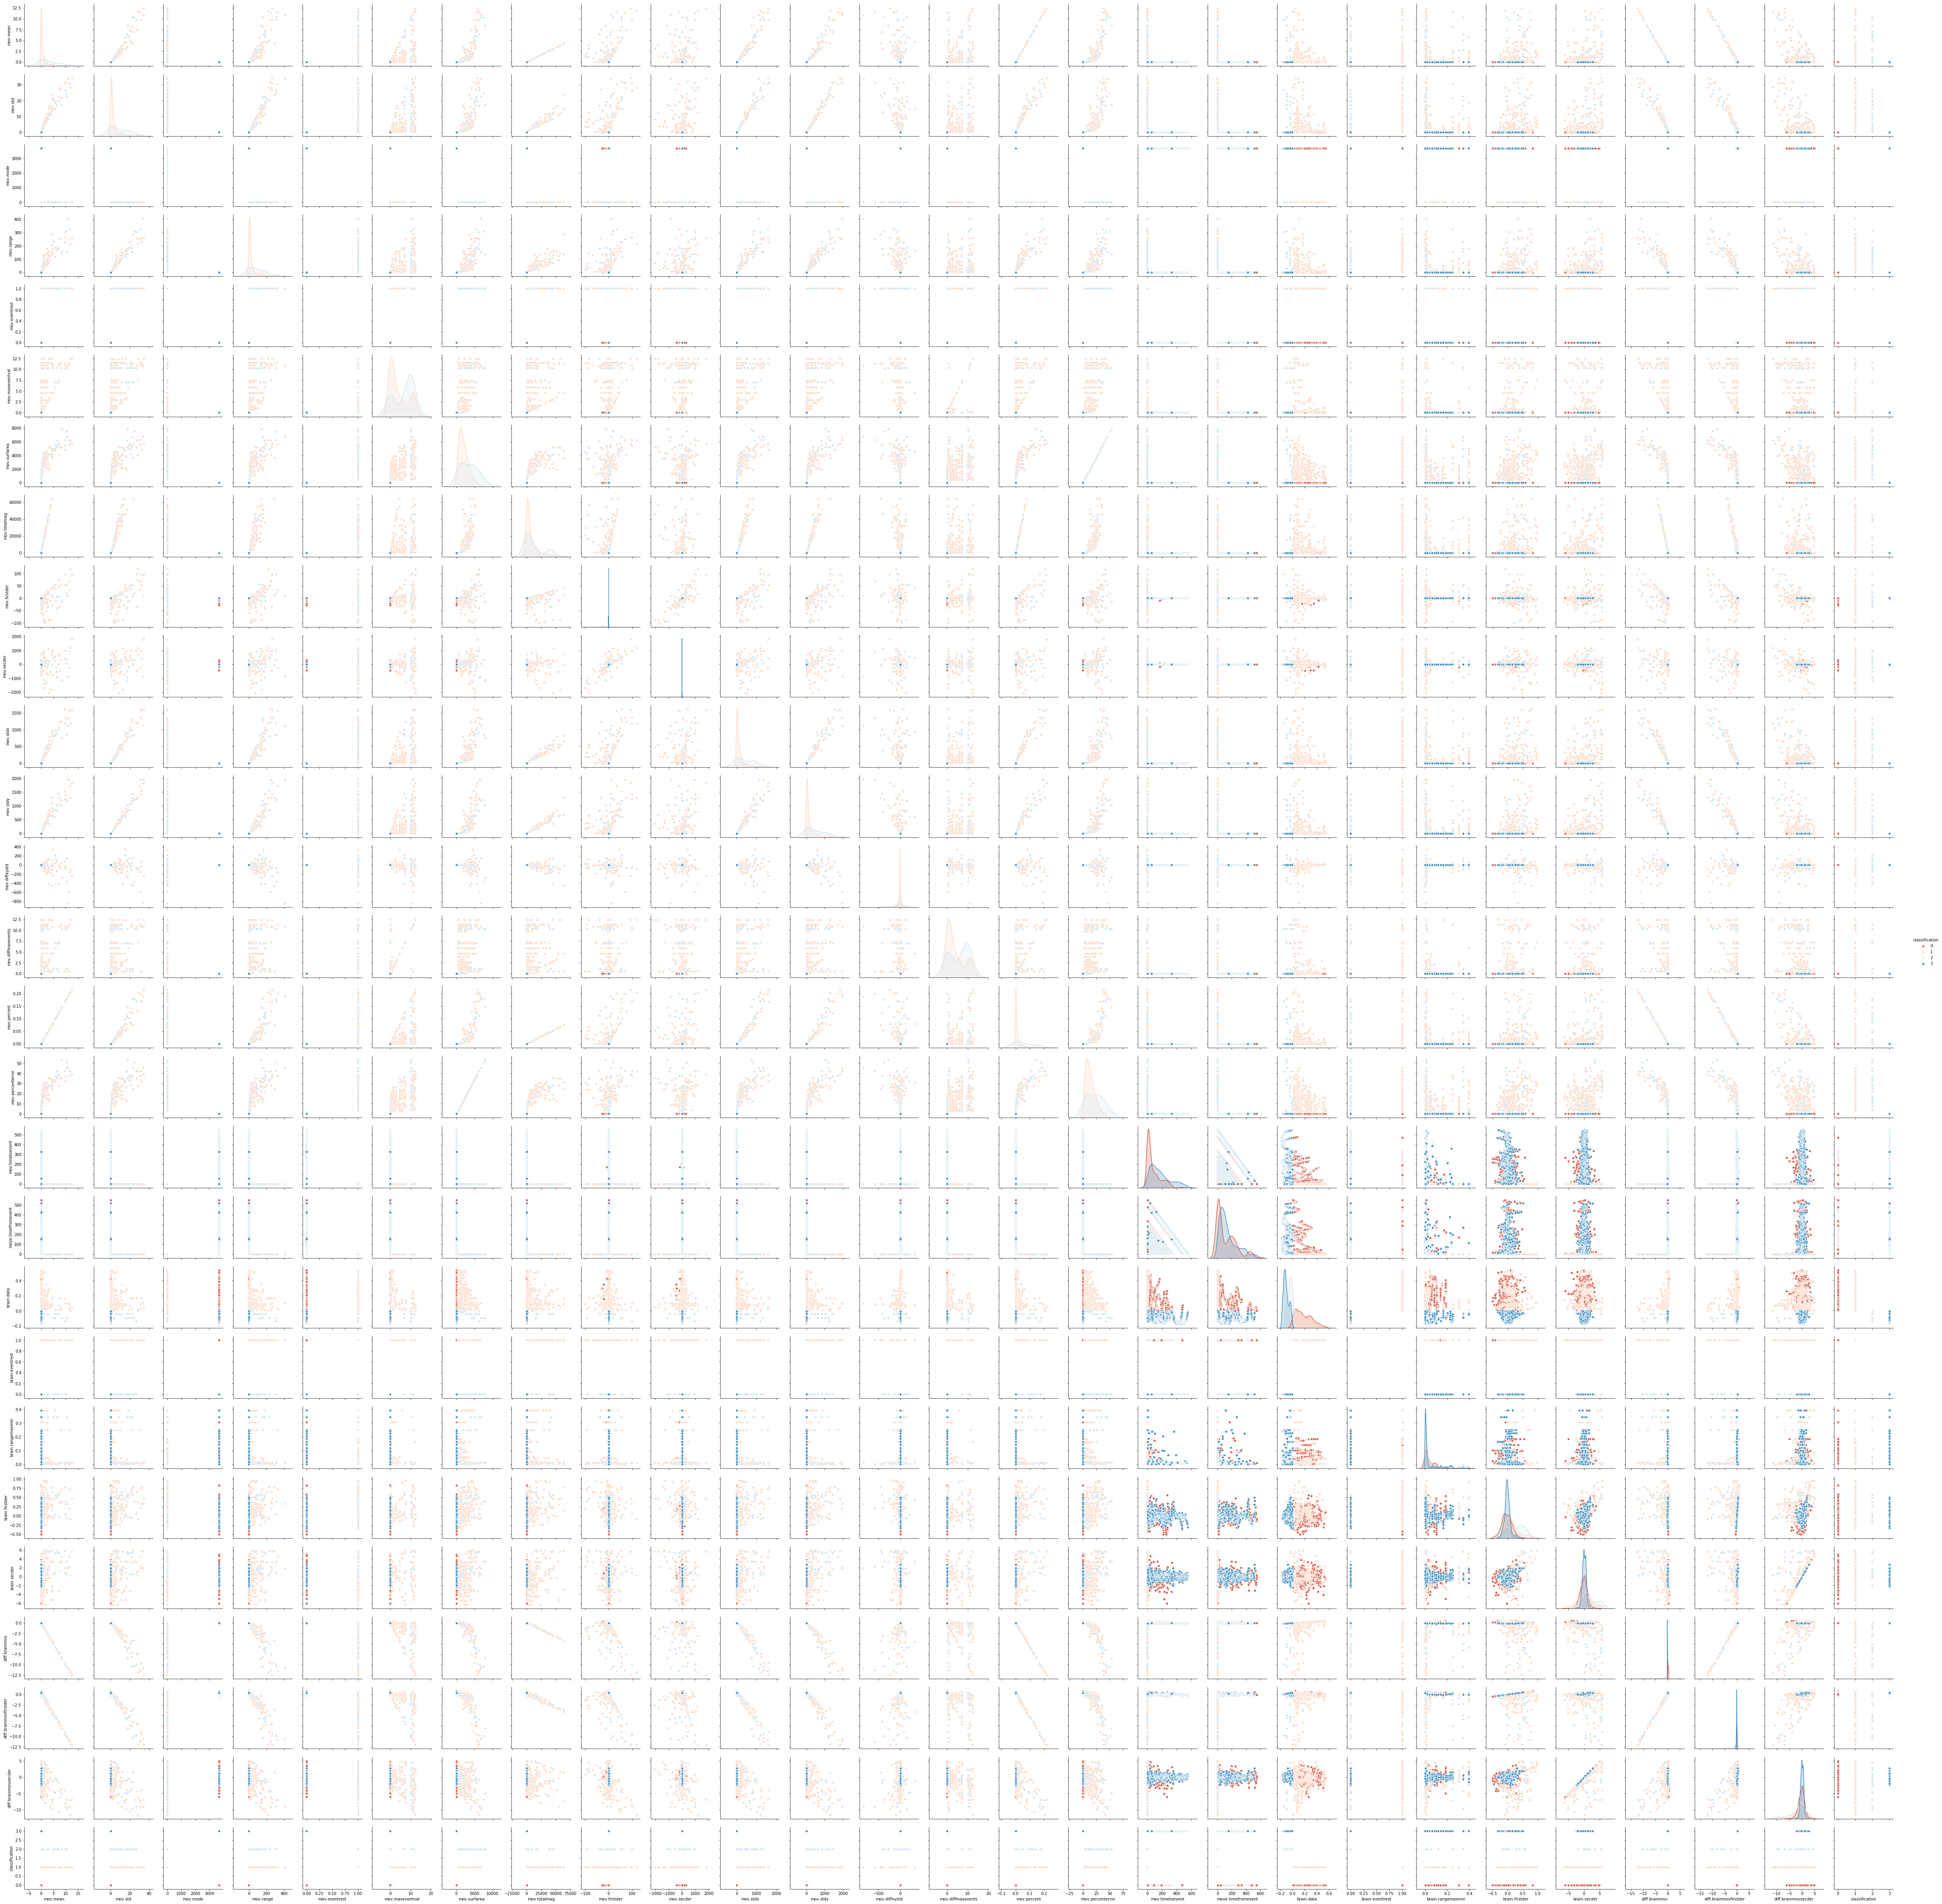

In [60]:
sns.pairplot(data, 
            diag_kind="kde",
            markers= ["o", "o", "o", "o"], 
            hue_order = [0, 1, 2, 3], hue='classification', palette = "RdBu")
plt.savefig('/Users/shreyamantripragada/Documents/metrics_pairplot.png')

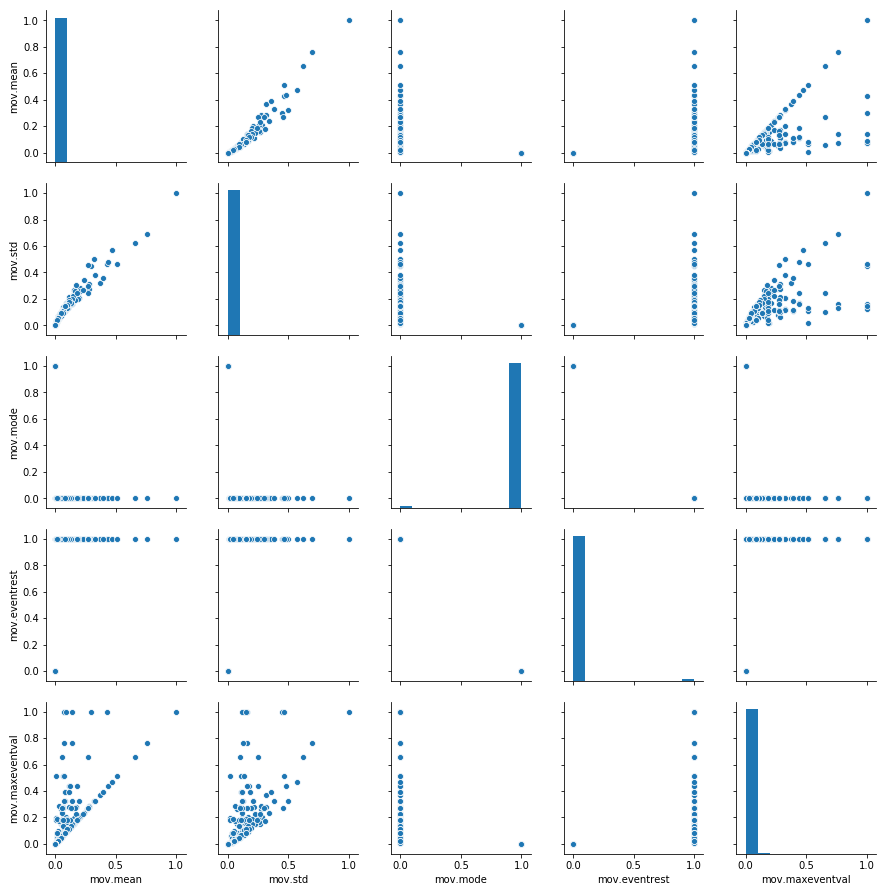

In [25]:
sns.pairplot(data.fillna(value=0)[['mov.mean', 'mov.std', 'mov.mode', 'mov.eventrest', 'mov.maxeventval']])                                 
                    

In [ ]:
%matplotlib inline

col_list = list(data)

#puts the paramter on a scale of 0 to 1

#datacopy = data.drop('age', axis =1).copy()
data -= data.min()
data /= data.max()
data = data.fillna(value=0)

In [ ]:
# Both temporal and spatial metrics visualize  
sns.pairplot(data, 
             diag_kind="kde")

plt.savefig('/Users/shreyamantripragada/Documents/metrics_pairplot.png')
plt.show()

In [ ]:
print(sns.__version__)

In [ ]:
plt.imshow(data.corr().values, aspect = "auto", cmap = "seismic")
plt.colorbar()

# Clustering Data

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt

import numpy as np

from sklearn import datasets
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import StratifiedKFold

print(__doc__)

colors = ['navy', 'turquoise', 'darkorange']


def make_ellipses(gmm, ax):
    for n, color in enumerate(colors):
        if gmm.covariance_type == 'full':
            covariances = gmm.covariances_[n][:2, :2]
        elif gmm.covariance_type == 'tied':
            covariances = gmm.covariances_[:2, :2]
        elif gmm.covariance_type == 'diag':
            covariances = np.diag(gmm.covariances_[n][:2])
        elif gmm.covariance_type == 'spherical':
            covariances = np.eye(gmm.means_.shape[1]) * gmm.covariances_[n]
        v, w = np.linalg.eigh(covariances)
        u = w[0] / np.linalg.norm(w[0])
        angle = np.arctan2(u[1], u[0])
        angle = 180 * angle / np.pi  # convert to degrees
        v = 2. * np.sqrt(2.) * np.sqrt(v)
        ell = mpl.patches.Ellipse(gmm.means_[n, :2], v[0], v[1],
                                  180 + angle, color=color)
        ell.set_clip_box(ax.bbox)
        ell.set_alpha(0.5)
        ax.add_artist(ell)
        ax.set_aspect('equal', 'datalim')

iris = data.load_iris()

# Break up the dataset into non-overlapping training (75%) and testing
# (25%) sets.
skf = StratifiedKFold(n_splits=4)
# Only take the first fold.
train_index, test_index = next(iter(skf.split(iris.data, iris.target)))


X_train = iris.data[train_index]
y_train = iris.target[train_index]
X_test = iris.data[test_index]
y_test = iris.target[test_index]

n_classes = len(np.unique(y_train))

# Try GMMs using different types of covariances.
estimators = {cov_type: GaussianMixture(n_components=n_classes,
              covariance_type=cov_type, max_iter=20, random_state=0)
              for cov_type in ['spherical', 'diag', 'tied', 'full']}

n_estimators = len(estimators)

plt.figure(figsize=(3 * n_estimators // 2, 6))
plt.subplots_adjust(bottom=.01, top=0.95, hspace=.15, wspace=.05,
                    left=.01, right=.99)


for index, (name, estimator) in enumerate(estimators.items()):
    # Since we have class labels for the training data, we can
    # initialize the GMM parameters in a supervised manner.
    estimator.means_init = np.array([X_train[y_train == i].mean(axis=0)
                                    for i in range(n_classes)])

    # Train the other parameters using the EM algorithm.
    estimator.fit(X_train)

    h = plt.subplot(2, n_estimators // 2, index + 1)
    make_ellipses(estimator, h)

    for n, color in enumerate(colors):
        data = iris.data[iris.target == n]
        plt.scatter(data[:, 0], data[:, 1], s=0.8, color=color,
                    label=iris.target_names[n])
    # Plot the test data with crosses
    for n, color in enumerate(colors):
        data = X_test[y_test == n]
        plt.scatter(data[:, 0], data[:, 1], marker='x', color=color)

    y_train_pred = estimator.predict(X_train)
    train_accuracy = np.mean(y_train_pred.ravel() == y_train.ravel()) * 100
    plt.text(0.05, 0.9, 'Train accuracy: %.1f' % train_accuracy,
             transform=h.transAxes)

    y_test_pred = estimator.predict(X_test)
    test_accuracy = np.mean(y_test_pred.ravel() == y_test.ravel()) * 100
    plt.text(0.05, 0.8, 'Test accuracy: %.1f' % test_accuracy,
             transform=h.transAxes)

    plt.xticks(())
    plt.yticks(())
    plt.title(name)

plt.legend(scatterpoints=1, loc='lower right', prop=dict(size=12))


plt.show()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  """


(4000, 26)
[[  60.27055795   -8.26912892]
 [-173.20799496    4.16028617]
 [  33.0286351   913.28624063]]
[0 0 0 ... 1 1 1]


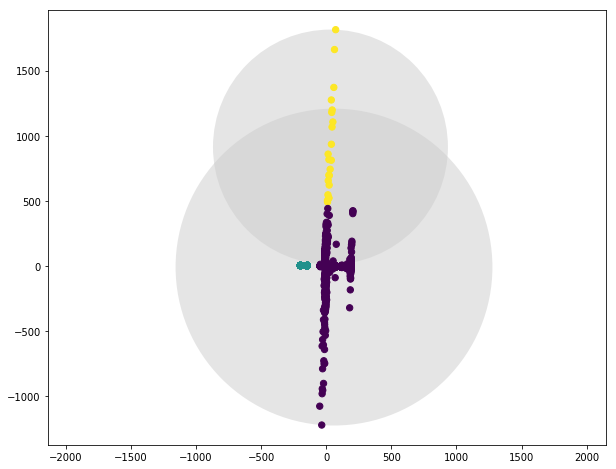

In [62]:
path = '/Users/shreyamantripragada/Documents/'
file = 'test_angs_mags_metrics.csv'

tsv_output_file = path + file
data = pd.DataFrame.from_csv(tsv_output_file)

'''
In PCA you are maximizing the length of the vector to each of the points from the center point
of the data (mean value of each of the two variables you are dealing with), at the same time, 
MINIMIZING the distance from each point to the line that you drew.

Maximizing variance & Orthogonalization
'''

sklearn_pca = PCA(n_components = 26)
Y_sklearn = sklearn_pca.fit_transform(data)
print(Y_sklearn.shape)
kmeans = KMeans(n_clusters=3, max_iter=600, algorithm = 'auto')
fitted = kmeans.fit(data)
prediction = kmeans.predict(data)

plt.figure(figsize = (10,8))
def plot_kmeans(kmeans, X, n_clusters=2, rseed=0, ax=None):
    labels = kmeans.fit_predict(X)

    # plot the input data
    ax = ax or plt.gca()
    ax.axis('equal')
    ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)

    # plot the representation of the KMeans model
    centers = kmeans.cluster_centers_
    print(centers)
    radii = [cdist(X[labels == i], [center]).max()
    
             for i, center in enumerate(centers)]
    for c, r in zip(centers, radii):
        ax.add_patch(plt.Circle(c, r, fc='#CCCCCC', lw=3, alpha=0.5, zorder=1))
    return labels

indices = plot_kmeans(kmeans, Y_sklearn[:,4:6])


print(indices)

#plot_kmeans(kmeans, Y_sklearn[:,4:6])

data_new[classificaton]:  0       2
1       2
2       2
3       2
4       2
5       2
6       2
7       2
8       2
9       2
10      2
11      2
12      2
13      2
14      2
15      2
16      2
17      2
18      2
19      2
20      2
21      2
22      2
23      2
24      2
25      2
26      2
27      2
28      2
29      2
       ..
3970    0
3971    0
3972    0
3973    0
3974    0
3975    0
3976    0
3977    0
3978    0
3979    0
3980    0
3981    0
3982    0
3983    0
3984    0
3985    0
3986    0
3987    0
3988    0
3989    0
3990    0
3991    0
3992    0
3993    0
3994    0
3995    0
3996    0
3997    0
3998    0
3999    0
Name: classification, Length: 4000, dtype: int64


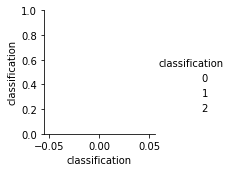

In [51]:
data_new = pd.DataFrame()
data_new - data.copy()
data_new = data_new.astype('float16')
indices = indices.astype('int')
data_new['classification'] = indices
print("data_new[classificaton]: ", data_new["classification"])
#print("data_new:" + str(data_new['classification']))
    
sns.pairplot(data_new, diag_kind = "kde", markers = ["o", "o", "o"], hue_order = [0, 1, 2], hue = 'classification', palette = 'viridis')
plt.savefig('/Users/shreyamantripragada/Documents/metrics_pairplot.png')



In [46]:
for i in indices:
    print(i)

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
2
2
2
2
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
2
1
2
2
0
0
0
0
0
2
2
2
1
2
1
0
2
2
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  """


(4000, 26)


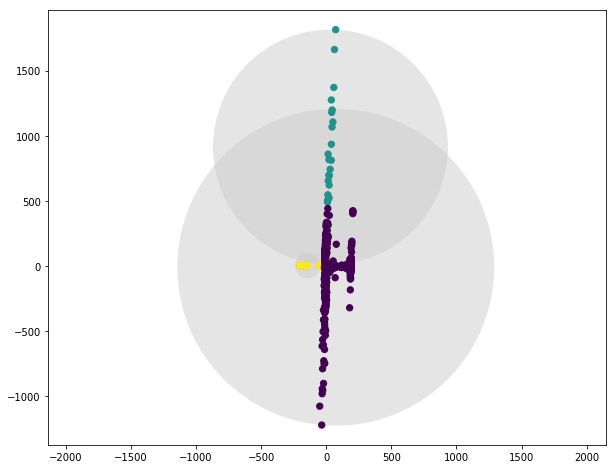

In [54]:
path = '/Users/shreyamantripragada/Documents/'
file = 'test_angs_mags_metrics.csv'

tsv_output_file = path + file
data = pd.DataFrame.from_csv(tsv_output_file)

'''
In PCA you are maximizing the length of the vector to each of the points from the center point
of the data (mean value of each of the two variables you are dealing with), at the same time, 
MINIMIZING the distance from each point to the line that you drew.

Maximizing variance & Orthogonalization
'''

sklearn_pca = PCA(n_components = 26)
Y_sklearn = sklearn_pca.fit_transform(data)
print(Y_sklearn.shape)
kmeans = KMeans(n_clusters=3, max_iter=600, algorithm = 'auto')
fitted = kmeans.fit(data)
prediction = kmeans.predict(data)

plt.figure(figsize = (10,8))
def plot_kmeans(kmeans, X, n_clusters=2, rseed=0, ax=None):
    labels = kmeans.fit_predict(X)
    # plot the input data
    ax = ax or plt.gca()
    ax.axis('equal')
    ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)

    # plot the representation of the KMeans model
    centers = kmeans.cluster_centers_
    radii = [cdist(X[labels == i], [center]).max()
             for i, center in enumerate(centers)]
    for c, r in zip(centers, radii):
        ax.add_patch(plt.Circle(c, r, fc='#CCCCCC', lw=3, alpha=0.5, zorder=1))
    return labels

indices = plot_kmeans(kmeans, Y_sklearn[:,4:6])

data_new :  0       0
1       0
2       0
3       0
4       0
5       0
6       0
7       0
8       0
9       0
10      0
11      0
12      0
13      0
14      0
15      0
16      0
17      0
18      0
19      0
20      0
21      0
22      0
23      0
24      0
25      0
26      0
27      0
28      0
29      0
       ..
3970    2
3971    2
3972    2
3973    2
3974    2
3975    2
3976    2
3977    2
3978    2
3979    2
3980    2
3981    2
3982    2
3983    2
3984    2
3985    2
3986    2
3987    2
3988    2
3989    2
3990    2
3991    2
3992    2
3993    2
3994    2
3995    2
3996    2
3997    2
3998    2
3999    2
Name: classification, Length: 4000, dtype: int64


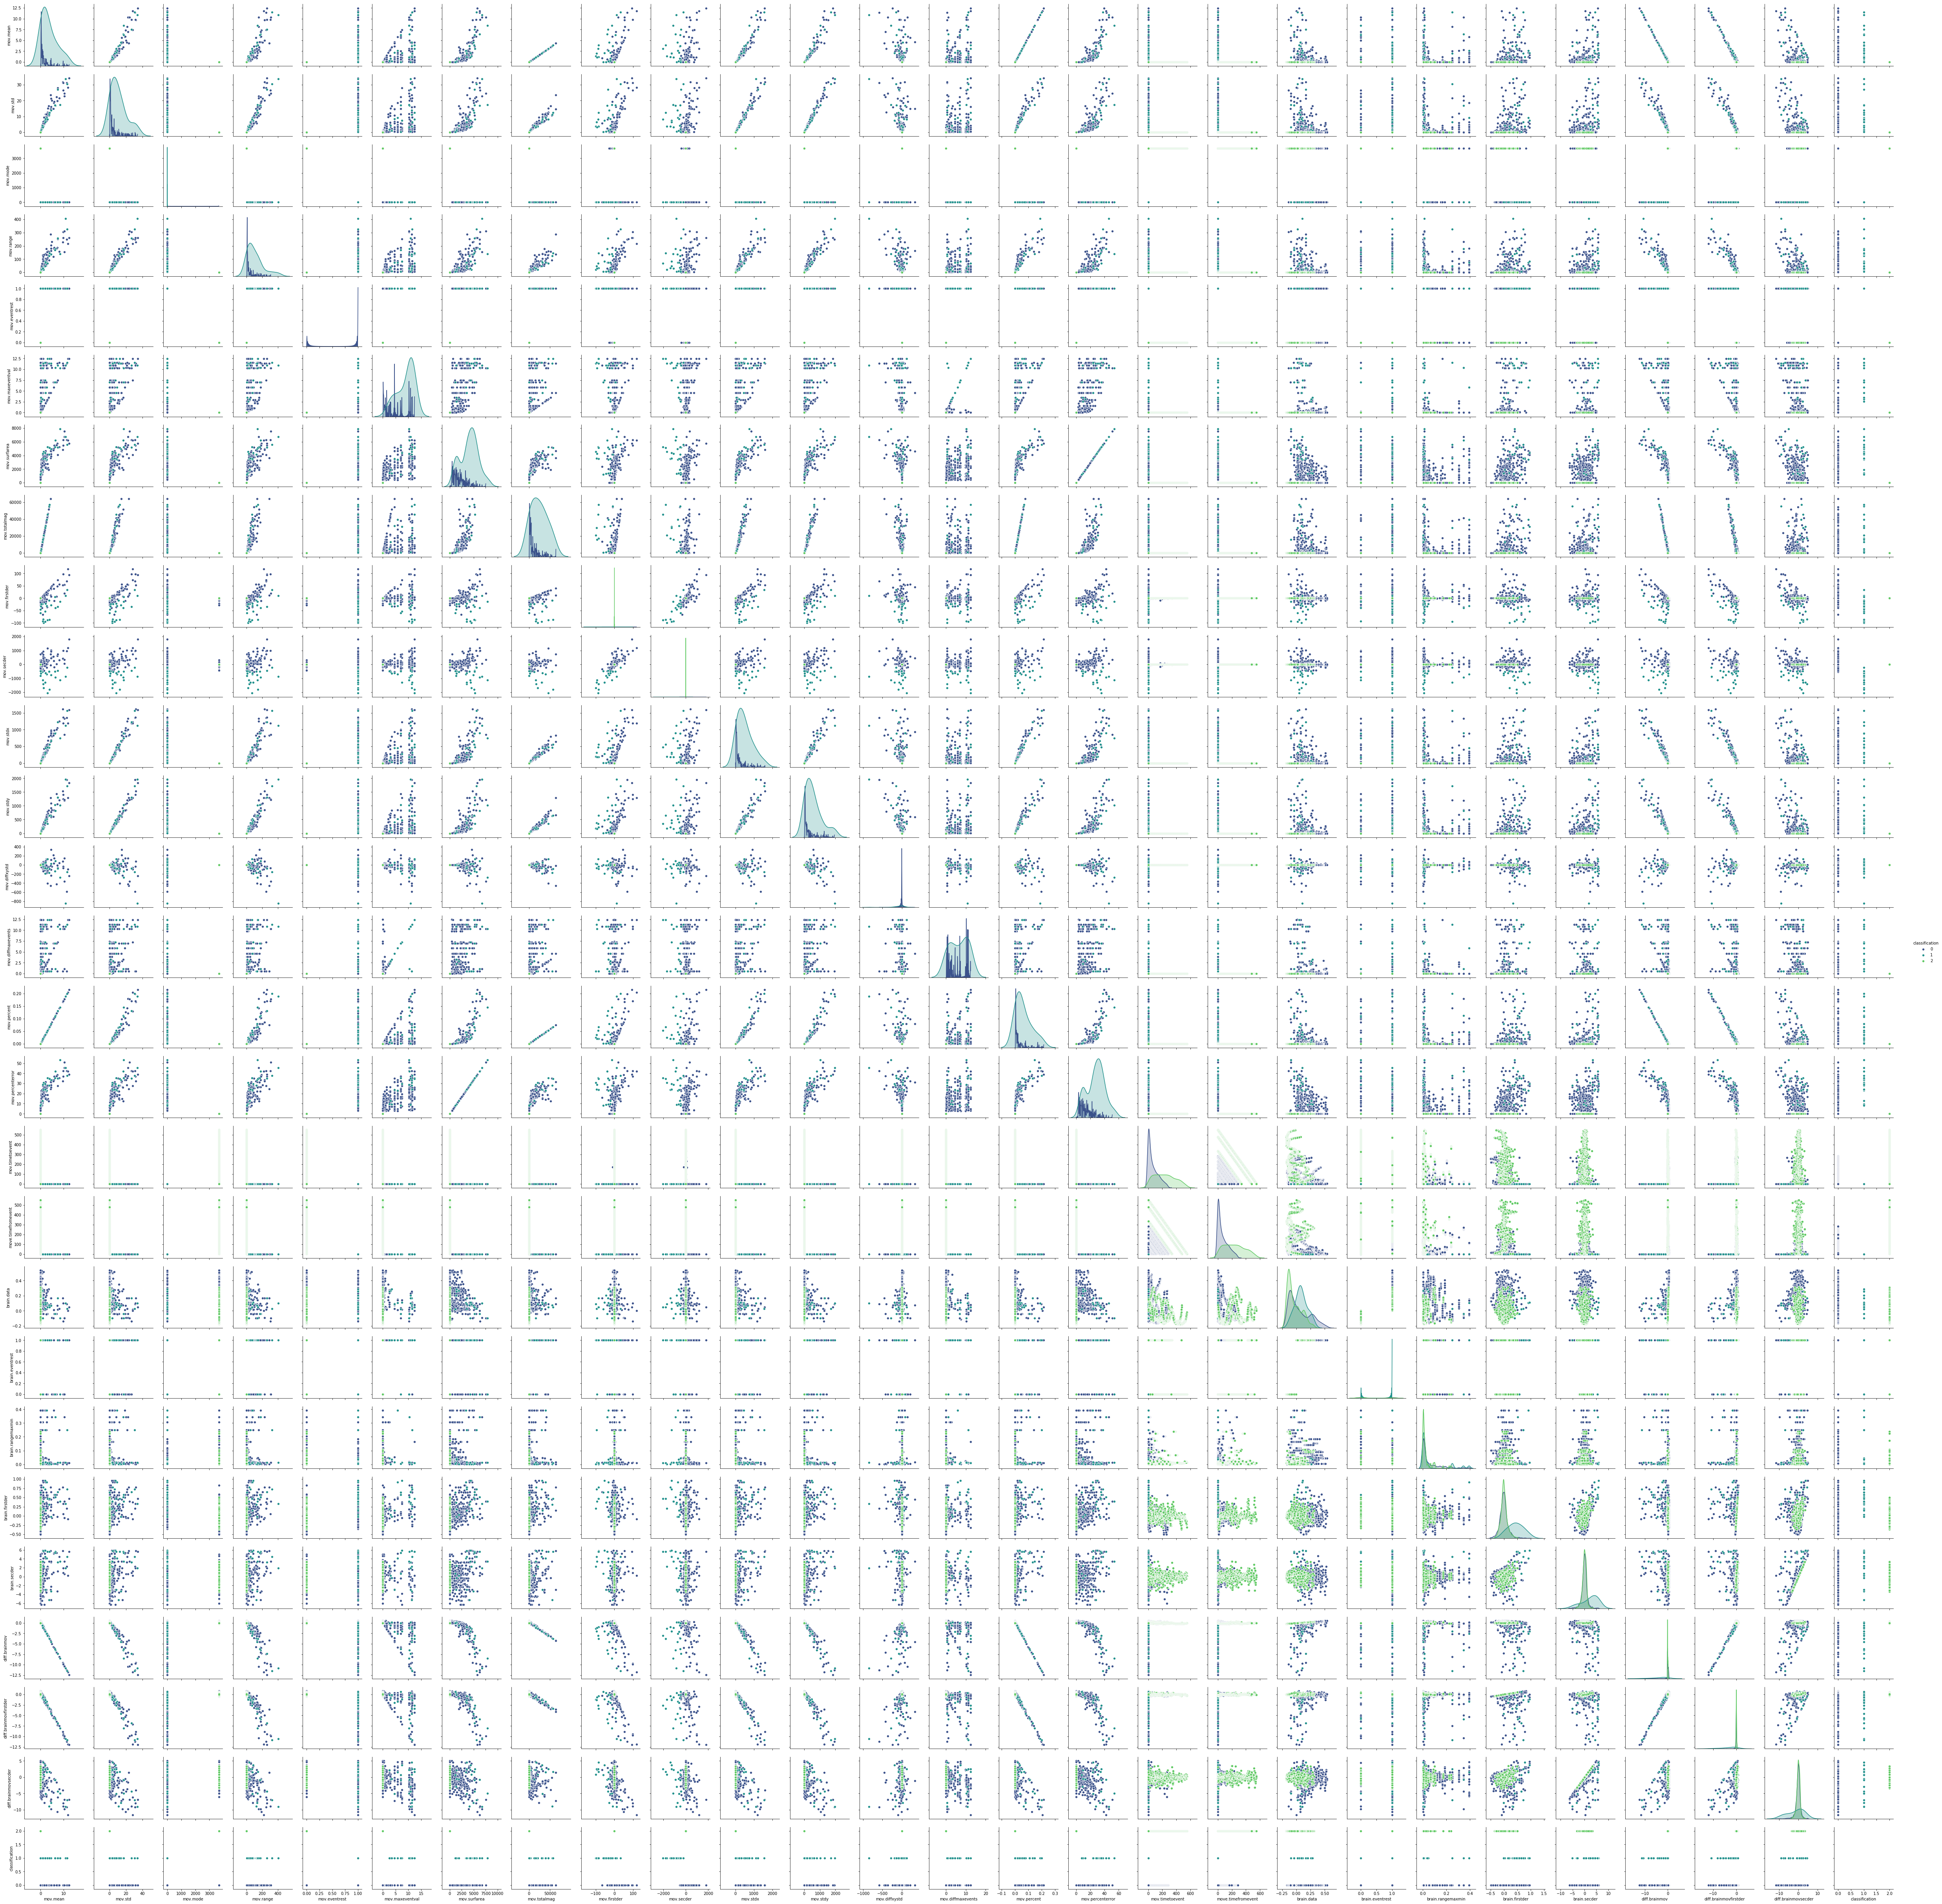

In [56]:
%matplotlib inline
col_list = list(data)
data_new = data.copy()

data_new -= data.min()
data_new /= data.max()

data_new = pd.DataFrame()
data_new = data_new.astype('float16')
indices = indices.astype('int')
data_new['classification'] = indices
print("data_new : ", data_new["classification"])
# Both temporal and spatial metrics visualize  

sns.pairplot(data_new, diag_kind="kde", markers=["o", "o", "o"], hue_order = [0, 1, 2], hue='classification', palette = 'viridis')
plt.savefig('/Users/shreyamantripragada/Documents/metrics_pairplot.png')

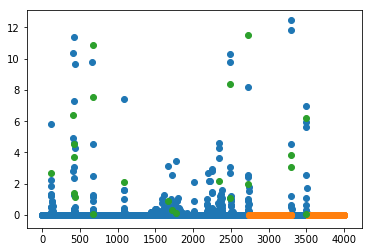

In [65]:
plt.scatter(np.array(np.where(indices==0)[0]), data.loc[np.where(indices==0)[0], "mov.mean"])
plt.scatter(np.array(np.where(indices==1)[0]), data.loc[np.where(indices==1)[0], "mov.mean"])
plt.scatter(np.array(np.where(indices==2)[0]), data.loc[np.where(indices==2)[0], "mov.mean"])


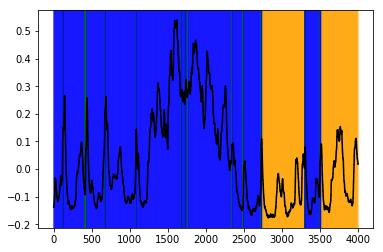

In [97]:
for i in range(len(indices)): 
    if (indices[i] == 0):
        plt.axvline(x = i, color='blue', alpha = 0.01)
    elif (indices[i] == 1):
        plt.axvline(x = i, color='orange', alpha = 0.01)
    elif (indices[i] == 2):
        plt.axvline(x = i, color='green')
    
plt.plot(data["brain.data"], color = "black")
# plt.scatter(np.array(np.where(indices==0)[0]), data.loc[np.where(indices==0)[0], "brain.data"])
# plt.scatter(np.array(np.where(indices==1)[0]), data.loc[np.where(indices==1)[0], "brain.data"])
# plt.scatter(np.array(np.where(indices==2)[0]), data.loc[np.where(indices==2)[0], "brain.data"])

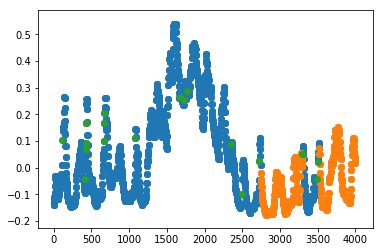

In [85]:
plt.scatter(np.array(np.where(indices==0)[0]), data.loc[np.where(indices==0)[0], "brain.data"])
plt.scatter(np.array(np.where(indices==1)[0]), data.loc[np.where(indices==1)[0], "brain.data"])
plt.scatter(np.array(np.where(indices==2)[0]), data.loc[np.where(indices==2)[0], "brain.data"])